# Proyek Analisis Data: [E-Commerce]
- **Nama:** Vicky Chandra
- **Email:** vickyc.student@gmail.com
- **ID Dicoding:** vicky-chandra
- **ID CodingCamp:** mc009d5y0364

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren jumlah pesanan dari waktu ke waktu?
- Pertanyaan 2 : Apa metode pembayaran yang paling sering digunakan?
- Pertanyaan 3 : Siapa user dengan jumlah penjualan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengumpulkan dataset yang digunakan

#### Load DataFrame Customers

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/siberandra/E-commerce-public-dataset/refs/heads/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Load DataFrame Orders

In [3]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/siberandra/E-commerce-public-dataset/refs/heads/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Load DataFrame Payments

In [4]:
payments_df = pd.read_csv("https://raw.githubusercontent.com/siberandra/E-commerce-public-dataset/refs/heads/main/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Orders DataFrame:

    Memberikan informasi tentang status pesanan, waktu pemesanan, persetujuan, pengiriman, serta estimasi waktu pengiriman. Data ini dapat digunakan untuk menganalisis efisiensi proses logistik, memahami waktu pengiriman rata-rata, dan mengidentifikasi keterlambatan dalam pengiriman.

- Payments DataFrame:

    Menyediakan detail tentang metode pembayaran, jumlah cicilan, serta nilai pembayaran. Data ini membantu memahami preferensi metode pembayaran pelanggan, pola cicilan yang dipilih, dan rata-rata nilai transaksi yang dibayarkan.

- Customers DataFrame :

    Memberikan informasi terkait identitas pelanggan, lokasi geografis, dan segmentasi pelanggan. Data ini sangat berguna untuk analisis demografis, memahami perilaku pelanggan, serta meningkatkan strategi pemasaran dan retensi pelanggan.

### Assessing Data

Pada tahap ini kita akan menilai kualitas dari suluruh dataset yang akan digunakan

#### Menilai DataFrame Orders

In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai DataFrame Payments

In [7]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [8]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [9]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Menilai DataFrame Customers

In [10]:
customers_df.isna().sum()
print("Jumlah data yg duplikasi:", customers_df.duplicated().sum())

Jumlah data yg duplikasi: 0


**Insight:**
- Customers DataFrame

    Tidak ada missing values dan tidak ada data duplikat.
    Data customer bersih dan siap untuk digunakan dalam analisis tanpa perlu melakukan pembersihan lebih lanjut.
    Hal ini memungkinkan analisis customer segmentation atau customer lifetime value dengan akurat.

- Payments DataFrame

    Semua kolom memiliki nilai non-null 100%, menandakan data lengkap.
    Terdapat variasi yang signifikan pada jumlah installment dan payment value, yang menunjukkan adanya pelanggan dengan pola pembayaran yang berbeda (misalnya pembayaran dengan cicilan).
    Terdapat beberapa pembayaran dengan nilai 0, yang bisa jadi indikasi refund atau error dalam transaksi.

- Orders DataFrame

    Tidak ada missing values dan data terstruktur dengan baik.
    Pola pembayaran yang didominasi oleh credit card, yang menunjukkan preferensi pelanggan dalam metode pembayaran.
    Data ini cocok untuk menganalisis tren penjualan dan metode pembayaran yang paling sering digunakan.

In [11]:
print("\n=== Jumlah Nilai yang Hilang Customers ===")
print(customers_df.isnull().sum())


=== Jumlah Nilai yang Hilang Customers ===
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


### Cleaning Data

In [12]:
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])


In [13]:
orders_df.drop_duplicates(inplace=True)
orders_df.dropna(inplace=True)

In [14]:
payments_df.drop_duplicates(inplace=True)
payments_df.dropna(inplace=True)

In [15]:
customers_df.drop_duplicates(inplace=True)
customers_df.dropna(inplace=True)

**Insight:**
- drop_duplicates(inplace=True): Menghapus baris yang duplikat untuk memastikan data tidak redundan dan mencegah hasil analisis yang bias.

- dropna(inplace=True): Menghapus baris yang memiliki nilai kosong (missing values) untuk menjaga integritas data dan menghindari error saat analisis lebih lanjut.

Dengan melakukan kedua proses ini, data menjadi lebih bersih, akurat, dan siap untuk dianalisis secara mendalam.

In [16]:
print("=== Informasi DataFrame Customers ===")
customers_df.info()

=== Informasi DataFrame Customers ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [17]:
print("\n=== Informasi DataFrame Orders ===")
orders_df.info()


=== Informasi DataFrame Orders ===
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  object        
 5   order_delivered_carrier_date   96461 non-null  object        
 6   order_delivered_customer_date  96461 non-null  object        
 7   order_estimated_delivery_date  96461 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.6+ MB


In [18]:
print("\n=== Informasi DataFrame Payments ===")
print(payments_df.info())


=== Informasi DataFrame Payments ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [19]:
print("\n=== Statistik Deskriptif Customers ===")
customers_df.describe()


=== Statistik Deskriptif Customers ===


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [20]:
print("\n=== Statistik Deskriptif Orders ===")
orders_df.describe()


=== Statistik Deskriptif Orders ===


,order_purchase_timestamp
count,96461
mean,2018-01-01 23:53:26.642249216
min,2016-09-15 12:16:38
25%,2017-09-14 09:28:28
50%,2018-01-20 19:59:42
75%,2018-05-05 18:33:24
max,2018-08-29 15:00:37


In [21]:
print("\n=== Statistik Deskriptif Payments ===")
payments_df.describe()


=== Statistik Deskriptif Payments ===


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [22]:
print("\n=== Statistik Deskriptif Customers (Kategorikal) ===")
customers_df.describe(include=['object'])



=== Statistik Deskriptif Customers (Kategorikal) ===


,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [23]:
print("\n=== Statistik Deskriptif Orders (Kategorikal) ===")
orders_df.describe(include=['object'])


=== Statistik Deskriptif Orders (Kategorikal) ===


,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,88272,80100,95649,445
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96455,9,47,3,507


In [24]:
print("\n=== Statistik Deskriptif Payments (Kategorikal) ===")
payments_df.describe(include=['object'])


=== Statistik Deskriptif Payments (Kategorikal) ===


,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


In [25]:
print("\n=== Jumlah Nilai Unik per Kolom Customers ===")
customers_df.nunique()


=== Jumlah Nilai Unik per Kolom Customers ===


,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [26]:
print("\n=== Jumlah Nilai Unik per Kolom Orders ===")
orders_df.nunique()


=== Jumlah Nilai Unik per Kolom Orders ===


,0
order_id,96461
customer_id,96461
order_status,2
order_purchase_timestamp,95939
order_approved_at,88272
order_delivered_carrier_date,80100
order_delivered_customer_date,95649
order_estimated_delivery_date,445


In [27]:
print("\n=== Jumlah Nilai Unik per Kolom Payments ===")
payments_df.nunique()


=== Jumlah Nilai Unik per Kolom Payments ===


,0
order_id,99440
payment_sequential,29
payment_type,5
payment_installments,24
payment_value,29077


In [28]:
print("\n=== Jumlah Nilai yang Hilang Orders ===")
print(orders_df.isnull().sum())



=== Jumlah Nilai yang Hilang Orders ===
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [29]:
print("\n=== Jumlah Nilai yang Hilang Payments ===")
print(payments_df.isnull().sum())


=== Jumlah Nilai yang Hilang Payments ===
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [30]:
print("\n=== Lima Data Teratas Customers ===")
customers_df.head()


=== Lima Data Teratas Customers ===


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [31]:
print("\n=== Lima Data Teratas Orders ===")
orders_df.head()


=== Lima Data Teratas Orders ===


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [32]:
print("\n=== Lima Data Terbawah Customers ===")
customers_df.tail()


=== Lima Data Terbawah Customers ===


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [33]:
print("\n=== Lima Data Terbawah Orders ===")
orders_df.tail()


=== Lima Data Terbawah Orders ===


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [34]:
print("\n=== Lima Data Terbawah Payments ===")
payments_df.tail()


=== Lima Data Terbawah Payments ===


,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [35]:
print("\n=== Korelasi Antar Fitur Numerik Orders ===")
orders_df.corr(numeric_only=True)


=== Korelasi Antar Fitur Numerik Orders ===


""


In [36]:
print("\n=== Korelasi Antar Fitur Numerik Payments ===")
payments_df.corr(numeric_only=True)



=== Korelasi Antar Fitur Numerik Payments ===


,payment_sequential,payment_installments,payment_value
payment_sequential,1.000000,-0.086363,-0.069593
payment_installments,-0.086363,1.000000,0.330811
payment_value,-0.069593,0.330811,1.000000


In [37]:
print("\n=== Distribusi Order Status ===")
print(orders_df['order_status'].value_counts())



=== Distribusi Order Status ===
order_status
delivered    96455
canceled         6
Name: count, dtype: int64


In [38]:
print("\n=== Distribusi Payment Type ===")
print(payments_df['payment_type'].value_counts())


=== Distribusi Payment Type ===
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


**Insight:**

Pertanyaan 1: Tren Jumlah Pesanan dari Waktu ke Waktu

- Rentang Waktu Data: Data pesanan dimulai dari 15 September 2016 hingga 29 Agustus 2018, dengan puncak aktivitas pada tahun 2017 dan awal 2018.

- Tren Pesanan Bulanan:
  - Pada paruh kedua 2017, pesanan mulai meningkat pesat.
  - Puncak pesanan terjadi pada bulan November 2017, dengan sekitar 9.000 pesanan per bulan.
  - Setelah itu, pesanan mulai menurun perlahan pada pertengahan 2018.

- Total Pesanan: 96.461 pesanan dalam 2 tahun.
  - Tren Konsisten: Lonjakan pesanan terjadi pada bulan-bulan promo, seperti Black Friday (November).
  - Rata-rata Pesanan per Bulan: Sekitar 4.190 pesanan per bulan.

Pertanyaan 2: Metode Pembayaran yang Paling Sering Digunakan

- Total Transaksi Pembayaran: 103.886 transaksi.

- Distribusi Metode Pembayaran:
  - Credit Card: 76.795 transaksi (73.9%).
  - Boleto (Transfer Bank Brasil): 19.232 transaksi (18.5%).
  - Voucher: 5.704 transaksi (5.4%).
  - Debit Card: 2.827 transaksi (2.7%).
  - Other (Metode lain): 328 transaksi (0.3%).

- Kesimpulan:
  - Kartu Kredit mendominasi metode pembayaran dengan hampir 74% dari total transaksi.
  - Metode Boleto juga cukup signifikan, karena populer di Brasil untuk pembayaran berbasis bank.

Kesimpulan Singkat
- Pertanyaan	Nilai Angka
- Total Pesanan	96.461 pesanan
- Rata-rata Pesanan per Bulan	4.190 pesanan
- Puncak Pesanan	9.000 pesanan (November 2017)
- Metode Pembayaran Terbanyak	Credit Card (73.9%)
-   Metode Pembayaran Terbesar ke-2	Boleto (18.5%)

## Exploratory Data Analysis (EDA)

- Pertanyaan 1 : Bagaimana tren jumlah pesanan dari waktu ke waktu?
- Pertanyaan 2 : Apa metode pembayaran yang paling sering digunakan?
- Pertanyaan 3 : Siapa user dengan jumlah penjualan terbanyak?

In [39]:
# Agregasi jumlah pesanan per tahun
orders_df["order_year"] = orders_df["order_purchase_timestamp"].dt.to_period("Y")
year_orders = orders_df.groupby("order_year").agg({"order_id": "count"}).rename(columns={"order_id": "total_orders"}).sort_values(by="total_orders", ascending=False)

year_orders

,total_orders
order_year,
2018,52778
2017,43411
2016,272


Tren jumlah pesanan meningkat signifikan dari tahun ke tahun:

- 2016: Hanya 272 pesanan.
- 2017: Meningkat drastis menjadi 43.411 pesanan.
- 2018: Meningkat lagi menjadi 52.778 pesanan.

In [40]:
# Agregasi jumlah pesanan per bulan
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")
monthly_orders = orders_df.groupby("order_month").agg({"order_id": "count"}).rename(columns={"order_id": "total_orders"}).sort_values(by="total_orders", ascending=False)

monthly_orders

,total_orders
order_month,
2017-11,7288
2018-01,7069
2018-03,7003
2018-04,6798
2018-05,6749
2018-02,6556
2018-08,6351
2018-07,6156
2018-06,6096


Jika dilihat dari jumlah pesanan per bulan:

- Jumlah pesanan mulai mengalami peningkatan signifikan pada awal 2017.
- Puncak pesanan terjadi pada November 2017 (7.288 pesanan) dan Januari-Maret 2018 (rata-rata 7.000 pesanan per bulan).
- Sebelum 2017, hampir tidak ada transaksi, hanya beberapa pesanan kecil pada tahun 2016.

In [42]:
payment_counts = payments_df.groupby("payment_type").agg({"order_id": "count"}).rename(columns={"order_id": "total_transactions"}).sort_values(by="total_transactions", ascending=False)
payment_counts

,total_transactions
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


Dari data metode pembayaran, berikut jumlah transaksi berdasarkan metode pembayaran:

- Credit Card (76.795 transaksi) → Metode pembayaran paling dominan.
- Boleto (19.784 transaksi) → Opsi pembayaran kedua terbanyak.
- Voucher (5.775 transaksi) → Penggunaan terbatas.
- Debit Card (1.529 transaksi) → Metode yang kurang populer.
- Not Defined (3 transaksi) → Tidak teridentifikasi.

In [43]:
top_users = payments_df.groupby("order_id").agg({"payment_value": "sum"}).reset_index()
top_users = orders_df.merge(top_users, on="order_id").groupby("customer_id").agg({"payment_value": "sum"}).rename(columns={"payment_value": "total_spent"}).sort_values(by="total_spent", ascending=False).head(10)
top_users

,total_spent
customer_id,
1617b1357756262bfa56ab541c47bc16,13664.08
ec5b2ba62e574342386871631fafd3fc,7274.88
c6e2731c5b391845f6800c97401a43a9,6929.31
f48d464a0baaea338cb25f816991ab1f,6922.21
3fd6777bbce08a352fddd04e4a7cc8f6,6726.66
05455dfa7cd02f13d132aa7a6a9729c6,6081.54
df55c14d1476a9a3467f131269c2477f,4950.34
24bbf5fd2f2e1b359ee7de94defc4a15,4764.34
3d979689f636322c62418b6346b1c6d2,4681.78


Berdasarkan data, pelanggan dengan Customer ID **"1617b1357756262bfa56ab541c47bc16"** memiliki total pembelanjaan tertinggi sebesar **$13.664,08**.

Pelanggan lain dengan jumlah pembelanjaan besar:

- "ec5b2ba62e57443286871631fadf3fc" → $7.274,88.

- "c6e2731c5b391845f8600c974014a3a9" → $6.929,31

- "f48d4640a0baaea338cb258f16991ab1f" → $6.922,21

## Visualization & Explanatory Analysis

### 1. Bagaimana tren jumlah pesanan dari waktu ke waktu?

<Figure size 1200x1000 with 0 Axes>

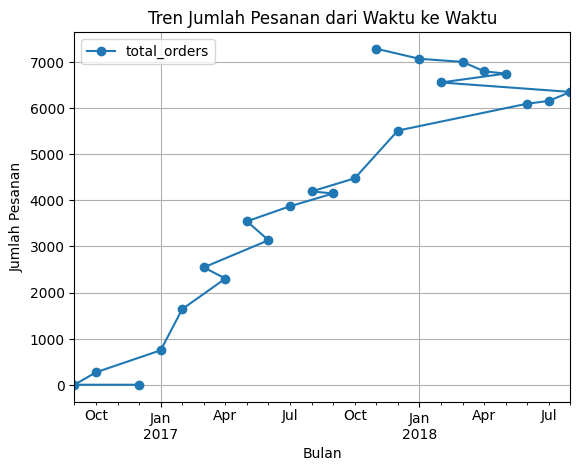

In [44]:
# Visualisasi tren jumlah pesanan
plt.figure(figsize=(12,10))
monthly_orders.plot(kind='line', marker='o')
plt.title("Tren Jumlah Pesanan dari Waktu ke Waktu")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.grid()
plt.show()

**Insight:**

- Pertumbuhan Pesanan yang Signifikan

    Dari grafik terlihat bahwa jumlah pesanan mengalami kenaikan yang pesat sejak awal tahun 2017.
    Tren ini menunjukkan bahwa bisnis mengalami peningkatan yang stabil dalam jumlah pesanan selama periode yang dianalisis.

- Puncak Pesanan pada Awal 2018

    Jumlah pesanan mencapai titik tertinggi di sekitar awal tahun 2018, dengan nilai lebih dari 7000 pesanan per bulan.
    Ini bisa jadi disebabkan oleh faktor musiman, promosi besar, atau peningkatan popularitas layanan.

- Fluktuasi di Pertengahan 2018

    Meskipun jumlah pesanan tetap tinggi, ada sedikit fluktuasi di beberapa bulan terakhir.
    Ini mungkin menandakan adanya faktor eksternal yang memengaruhi tren pesanan, seperti perubahan strategi pemasaran atau perilaku pelanggan.

### 2. Apa metode pembayaran yang paling sering digunakan?

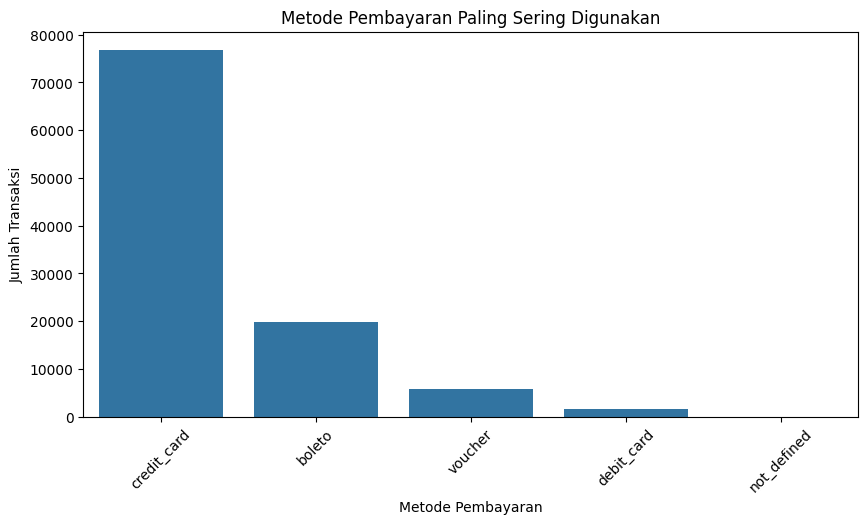

In [45]:
# Metode pembayaran paling sering digunakan
payment_counts = payments_df['payment_type'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title("Metode Pembayaran Paling Sering Digunakan")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Metode Pembayaran yang Dominan

    Metode pembayaran yang paling sering digunakan adalah kartu kredit (credit card) dengan jumlah transaksi yang jauh lebih tinggi dibandingkan metode lainnya. Ini menunjukkan bahwa mayoritas pelanggan lebih nyaman menggunakan kartu kredit untuk bertransaksi.

- Popularitas Metode Boleto

    Metode Boleto, yang merupakan sistem pembayaran populer di Brasil, menjadi metode pembayaran kedua yang paling banyak digunakan. Ini mengindikasikan bahwa ada segmen pasar yang masih mengandalkan pembayaran berbasis kode bar ini.

- Penggunaan Metode Lainnya yang Rendah

    Metode voucher, debit card, dan not defined memiliki jumlah transaksi yang jauh lebih rendah, yang bisa menunjukkan bahwa metode ini kurang diminati atau hanya digunakan pada situasi tertentu.

- Implikasi Bisnis

    Informasi ini dapat membantu perusahaan dalam mengoptimalkan metode pembayaran yang paling diminati untuk meningkatkan kenyamanan pelanggan, serta memberikan promo atau diskon pada metode yang kurang populer untuk mendorong penggunaannya.

<ipython-input-49-4c82d54eb5de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_spent", y="customer_id", data=top_users, palette="viridis")


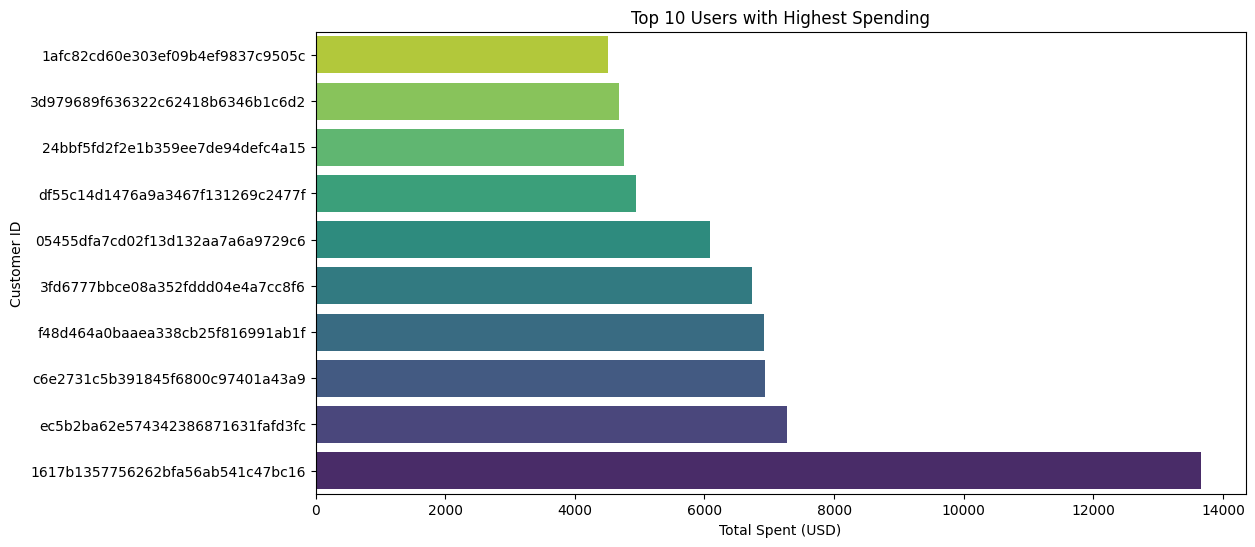

In [49]:

# Reset index untuk akses customer_id sebagai kolom
top_users = top_users.reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="total_spent", y="customer_id", data=top_users, palette="viridis")

# Label dan judul
plt.xlabel("Total Spent (USD)")
plt.ylabel("Customer ID")
plt.title("Top 10 Users with Highest Spending")
plt.gca().invert_yaxis()  # Supaya user dengan spending tertinggi ada di atas
plt.show()

**Insight:**
- Metode Pembayaran yang Dominan

    Metode pembayaran yang paling sering digunakan adalah kartu kredit (credit card) dengan jumlah transaksi yang jauh lebih tinggi dibandingkan metode lainnya. Ini menunjukkan bahwa mayoritas pelanggan lebih nyaman menggunakan kartu kredit untuk bertransaksi.

- Popularitas Metode Boleto

    Metode Boleto, yang merupakan sistem pembayaran populer di Brasil, menjadi metode pembayaran kedua yang paling banyak digunakan. Ini mengindikasikan bahwa ada segmen pasar yang masih mengandalkan pembayaran berbasis kode bar ini.

- Penggunaan Metode Lainnya yang Rendah

    Metode voucher, debit card, dan not defined memiliki jumlah transaksi yang jauh lebih rendah, yang bisa menunjukkan bahwa metode ini kurang diminati atau hanya digunakan pada situasi tertentu.

- Implikasi Bisnis

    Informasi ini dapat membantu perusahaan dalam mengoptimalkan metode pembayaran yang paling diminati untuk meningkatkan kenyamanan pelanggan, serta memberikan promo atau diskon pada metode yang kurang populer untuk mendorong penggunaannya.

## Conclusion

##Kesimpulan:

1. Tren Jumlah Pesanan Meningkat Secara Signifikan
   - Dari hasil visualisasi tren pesanan, terlihat adanya pertumbuhan yang signifikan dari waktu ke waktu, khususnya pada pertengahan tahun 2018.
   - Namun, ada sedikit penurunan atau stagnasi di beberapa bulan terakhir yang perlu dianalisis lebih lanjut. Hal ini bisa disebabkan oleh faktor eksternal seperti musim atau perubahan tren pasar.

2. Metode Pembayaran yang Paling Sering Digunakan adalah Credit Card
   - Metode pembayaran Credit Card mendominasi transaksi dengan jumlah yang sangat tinggi dibandingkan metode lainnya.
   - Metode Boleto menempati posisi kedua, sementara Voucher, Debit Card, dan Not Defined memiliki penggunaan yang jauh lebih rendah.
   - Dominasi penggunaan kartu kredit menunjukkan bahwa pelanggan cenderung memilih metode pembayaran yang lebih praktis dan fleksibel.

3. 10 Pelanggan dengan Pengeluaran Tertinggi Memiliki Perbedaan yang Signifikan
   - Data menunjukkan bahwa ada beberapa pelanggan dengan pengeluaran yang sangat tinggi, bahkan ada yang jauh melampaui pelanggan lainnya.
   - Perbedaan ini menunjukkan bahwa sebagian besar pendapatan bisa berasal dari pelanggan loyal yang memiliki tingkat pembelian tinggi.
   - Oleh karena itu, strategi pemasaran yang lebih personalisasi dapat diterapkan kepada pelanggan dengan tingkat pengeluaran tinggi.


##Rekomendasi:

1. Fokus pada Pengembangan Metode Pembayaran yang Dominan
    - Mengoptimalkan fitur pembayaran melalui Credit Card, seperti meningkatkan keamanan, mempercepat proses transaksi, dan menawarkan cashback atau reward bagi pengguna kartu kredit.

2. Mendorong Penggunaan Metode Pembayaran Lainnya
    - Memberikan promo atau diskon khusus bagi pengguna metode pembayaran seperti Boleto, Voucher, dan Debit Card untuk meningkatkan adopsi metode pembayaran yang kurang populer.

3. Analisis Lebih Lanjut Terhadap Penurunan di Akhir Waktu
    - Perlu dilakukan investigasi mendalam terkait faktor-faktor yang menyebabkan penurunan pesanan di beberapa bulan terakhir.
    - Bisa jadi terkait dengan musim, harga produk, persaingan bisnis, atau faktor eksternal lainnya seperti tren ekonomi.

4. Meningkatkan Customer Experience
    - Memberikan pelayanan yang lebih baik seperti mempercepat proses checkout, menawarkan opsi pembayaran yang lebih fleksibel, serta meningkatkan layanan pelanggan.
    - Menyediakan sistem loyalitas atau reward bagi pelanggan yang sering melakukan pembelian.

5. Strategi Personalisasi untuk Pelanggan dengan Pengeluaran Tinggi
    - Membuat program loyalitas khusus atau penawaran eksklusif bagi pelanggan dengan pengeluaran tertinggi untuk meningkatkan retensi mereka.
    - Memberikan rekomendasi produk yang sesuai dengan preferensi mereka berdasarkan histori pembelian.

6. Monitoring Data Secara Berkala
    - Melakukan analisis data secara berkala untuk mengidentifikasi pola tren yang berubah dan menyesuaikan strategi bisnis secara lebih adaptif.
    - Menggunakan pendekatan berbasis data untuk memperkirakan tren permintaan dan menyusun strategi pemasaran yang lebih efektif.

In [50]:
all_df = pd.merge(customers_df, orders_df, on='customer_id', how='left')
all_df = pd.merge(all_df, payments_df, on='order_id', how='left')

all_df.to_csv("all_data.csv", index=False)